In [3]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [4]:
data = pd.read_csv('Apple-Fitness-Data.csv')
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [5]:
data.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

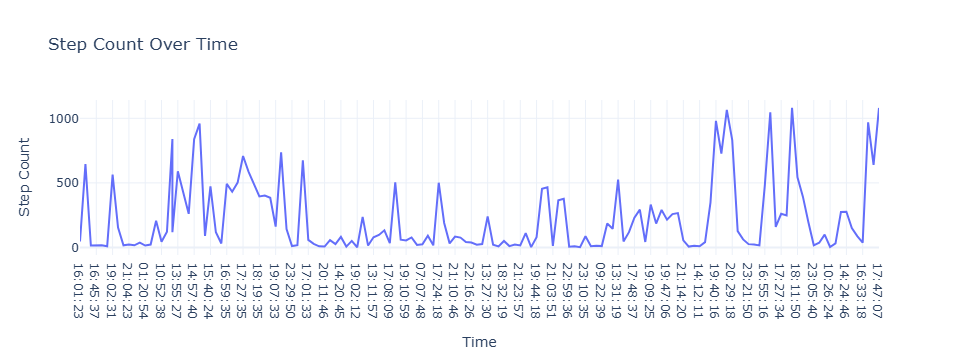

In [7]:
fig = px.line(data, x = 'Time',y= 'Step Count',title = 'Step Count Over Time')
fig.show()

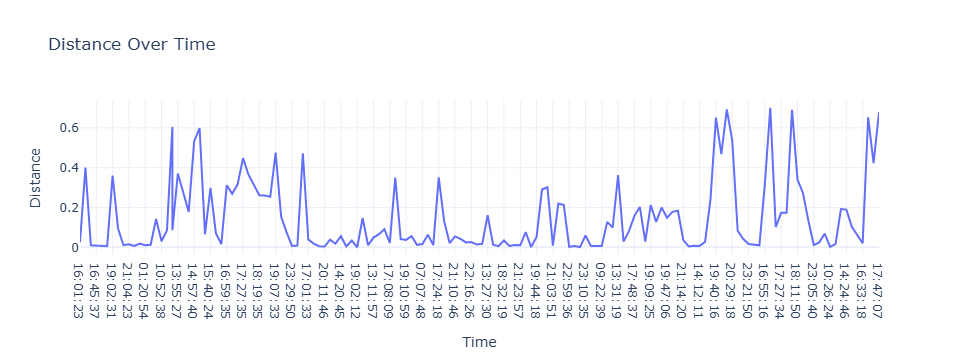

In [8]:
fig = px.line(data, x = 'Time',y='Distance',title ='Distance Over Time')
fig.show()

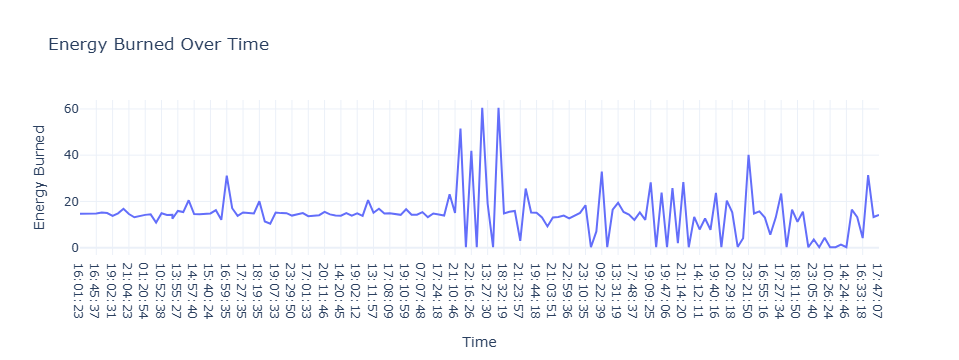

In [9]:
fig = px.line(data, x = 'Time',y='Energy Burned',title ='Energy Burned Over Time')
fig.show()

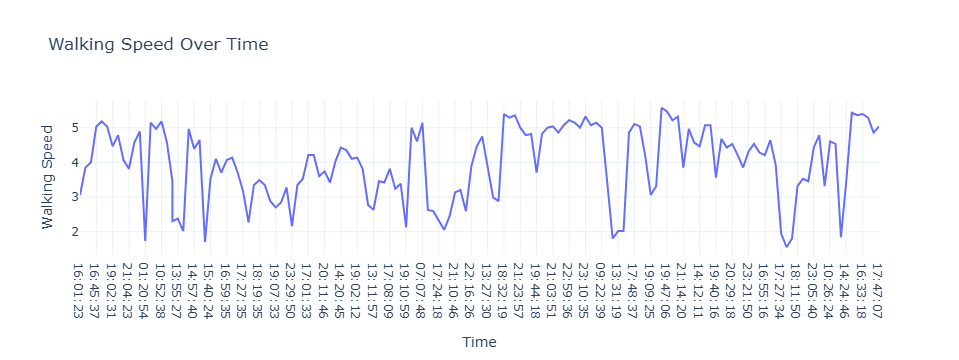

In [10]:
fig = px.line(data, x = 'Time',y='Walking Speed',title ='Walking Speed Over Time')
fig.show()

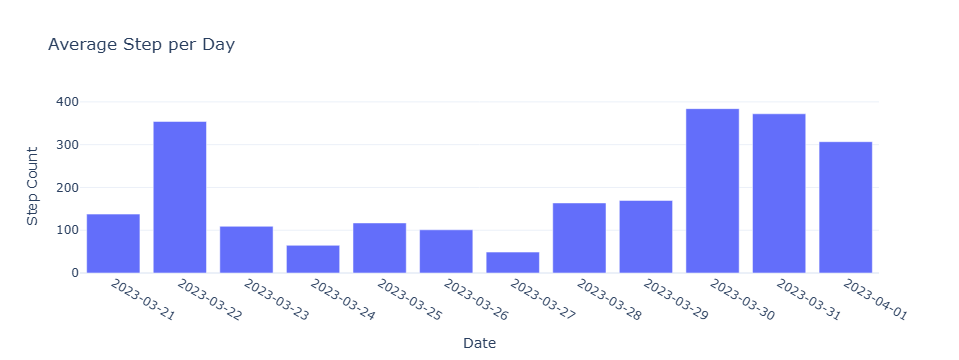

In [12]:
average_step_count_per_day = data.groupby("Date")['Step Count'].mean().reset_index()
fig = px.bar(average_step_count_per_day,x = 'Date',y= 'Step Count',title = 'Average Step per Day')
fig.update_xaxes(type = 'category')
fig.show()

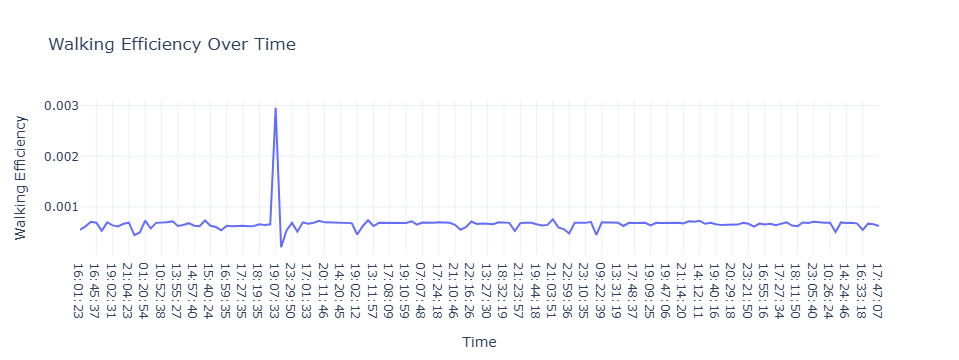

In [13]:
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

fig6 = px.line(data, x="Time",
               y="Walking Efficiency",
               title="Walking Efficiency Over Time")
fig6.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10576\2894008012.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



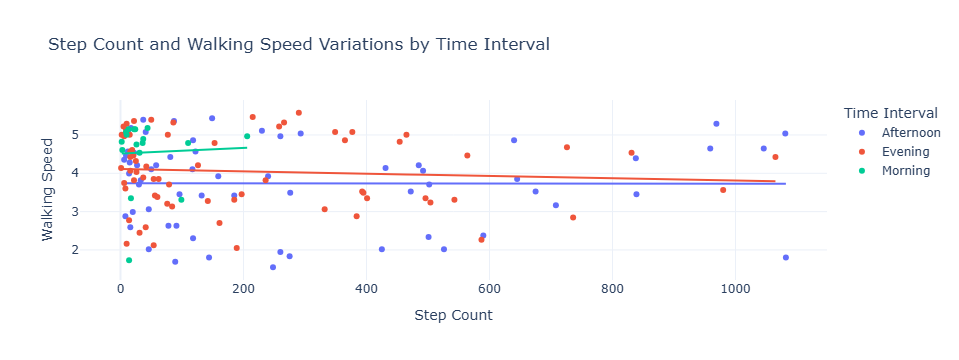

In [14]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(data, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show()